<a href="https://colab.research.google.com/github/PaletteofDesign/logistic-random-forest-or-knn/blob/main/logistic%2C_random_forest%2C_or_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier

In [3]:
f = '/content/wine.data'
wine = pd.read_csv(f, header=None, delimiter=',')
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.rename(columns={0:'Wine_type', 1:'Alcohol', 2:'Malic_acid', 3:'Ash', 4:'Alcalinity_of_ash', 5:'Magnesium', 6:'Total_phenols',
             7:'Flavanoids', 8:'Nonflavanoid_phenols', 9:'Proanthocyanins', 10:'Color_intensity', 11:'Hue', 12:'OD280/OD315_of_diluted_wine',
             13:'Proline'}, inplace=True)
wine.head()

,Wine_type,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wine,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wine_type                    178 non-null    int64  
 1   Alcohol                      178 non-null    float64
 2   Malic_acid                   178 non-null    float64
 3   Ash                          178 non-null    float64
 4   Alcalinity_of_ash            178 non-null    float64
 5   Magnesium                    178 non-null    int64  
 6   Total_phenols                178 non-null    float64
 7   Flavanoids                   178 non-null    float64
 8   Nonflavanoid_phenols         178 non-null    float64
 9   Proanthocyanins              178 non-null    float64
 10  Color_intensity              178 non-null    float64
 11  Hue                          178 non-null    float64
 12  OD280/OD315_of_diluted_wine  178 non-null    float64
 13  Proline             

In [6]:
wine.nunique()

Wine_type                        3
Alcohol                        126
Malic_acid                     133
Ash                             79
Alcalinity_of_ash               63
Magnesium                       53
Total_phenols                   97
Flavanoids                     132
Nonflavanoid_phenols            39
Proanthocyanins                101
Color_intensity                132
Hue                             78
OD280/OD315_of_diluted_wine    122
Proline                        121
dtype: int64

In [7]:
wine['Wine_type'].value_counts()

2    71
1    59
3    48
Name: Wine_type, dtype: int64

## Logistic Regression - One-vs-one

In [8]:
X = wine.drop(columns=['Wine_type'])
y = wine['Wine_type']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
log_reg = LogisticRegression()
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
print('Training accuracy:', ovo.score(X_train, y_train))
print('Test accuracy:', ovo.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


## Logistic Regression - One-versus-all

In [28]:
log_reg_all = LogisticRegression(multi_class = 'ovr')
log_reg_all.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9814814814814815


## l1 Regularization


In [16]:
log_reg = LogisticRegression(penalty = 'l1', solver = 'liblinear')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9814814814814815


## l2 Regularization

In [18]:
log_reg = LogisticRegression(penalty = 'l2')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9814814814814815


## KNN

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9444444444444444


## Bagged Tree

In [20]:
bt = BaggingClassifier()
bt.fit(X_train, y_train)
print('Training accuracy:', bt.score(X_train, y_train))
print('Test accuracy:', bt.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9814814814814815


## Random Forest

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9814814814814815


In [22]:
log_reg.coef_

array([[ 0.74554303,  0.09200655,  0.39952025, -0.83270352,  0.11173747,
         0.32384292,  0.67270761,  0.0037452 , -0.00203717,  0.0905956 ,
         0.06107239,  0.56664939,  0.86971516],
       [-0.95421747, -0.38106692, -0.774895  ,  0.59321275, -0.18907112,
        -0.12048278,  0.1965673 , -0.00568903,  0.54567422, -0.80462331,
         0.70482081, -0.00775844, -0.93926502],
       [ 0.20867444,  0.28906037,  0.37537474,  0.23949077,  0.07733365,
        -0.20336014, -0.86927491,  0.00194383, -0.54363706,  0.71402772,
        -0.7658932 , -0.55889096,  0.06954986]])

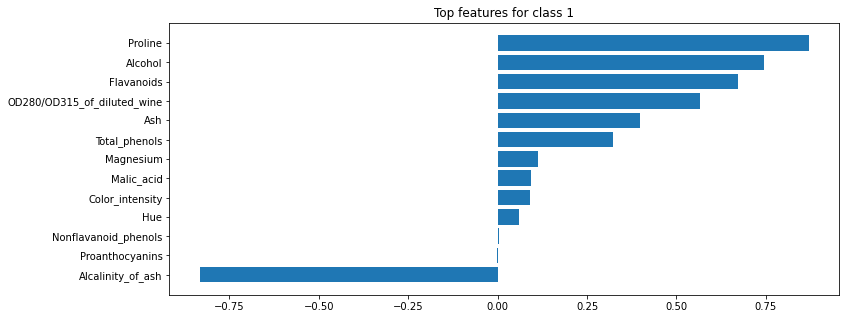

In [23]:
coef_df = pd.DataFrame(zip(X.columns, log_reg.coef_[0]), columns = ['Feature', 'Coef'])
coef_df.sort_values(by = 'Coef', inplace = True)
plt.figure(figsize = (12, 5))
plt.barh(coef_df['Feature'], coef_df['Coef'])
plt.title('Top features for class 1');

##After you have completed the two tasks, answer the following questions.

Which model performed the best?

All of the models performed around the same. The Logistic Regression model performed the best. KNN was slighly lower on accuracy over the other versions.

What are the most important features for your models? Is there a model that you liked the best and why?

The logistics model being the newest to learn is interesting. SOme of the main features according to the above graph include proline, alcohol, and flavanoids.

